<a href="https://colab.research.google.com/github/shyamilyh/Data-Science-Portfolio-Projects/blob/main/Stock_Price_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective
Build a stock market price predictor using historical stock data, including data collection, preprocessing, training and evaluating Linear Regression, Random Forest, and LSTM models, and visualizing the actual vs. predicted prices.

## Data collection

Gather historical stock price data for a chosen stock (e.g., AAPL) from a source like Yahoo Finance or Kaggle.


The subtask requires downloading historical stock data for AAPL using yfinance and storing it in a pandas DataFrame.



In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol and date range
ticker = 'AAPL'
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365) # Approximately 5 years

# Download the data
aapl_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataframe
display(aapl_data.head())

/tmp/ipython-input-9-4232514942.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-07-09,93.078041,93.627255,92.028205,93.573791,125642800
2020-07-10,93.240852,93.299182,92.059792,92.672193,90257200
2020-07-13,92.810730,97.163170,92.596874,94.548302,191649200
2020-07-14,94.346596,94.538574,91.255416,92.191026,170989200
2020-07-15,94.995438,96.475412,93.794932,96.225104,153198000


## Data preprocessing

Clean and preprocess the data, handling missing values and scaling the features if necessary. This might include creating new features like moving averages.



Calculate the 20-day moving average, handle missing values, and create the feature and target variables.



In [ ]:
# Calculate the 20-day moving average
window_size = 20
aapl_data[('Moving_Average_20d', '')] = aapl_data[('Close', 'AAPL')].rolling(window=window_size).mean()

# Handle missing values introduced by the moving average calculation
aapl_data.dropna(inplace=True)

# Create the feature set X
X = aapl_data[[('Open', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Volume', 'AAPL'), ('Moving_Average_20d', '')]].copy()

# Create the target variable y
y = aapl_data[('Close', 'AAPL')].copy()

# Display the first few rows of X and y
display(X.head())
display(y.head())

Price,Open,High,Low,Volume,Moving_Average_20d
Ticker,AAPL,AAPL,AAPL,AAPL,
Date,,,,,
2020-08-05,106.322493,107.309142,105.855896,121776800,95.607369
2020-08-06,107.321276,111.216842,106.730746,202428800,96.489521
2020-08-07,110.241487,110.699184,107.405232,198045600,97.237667
2020-08-10,109.652332,110.796576,107.120397,212403600,98.085955
2020-08-11,109.038833,109.537914,106.251265,187902400,98.694214


,Close
,AAPL
Date,
2020-08-05,106.988358
2020-08-06,110.721085
2020-08-07,108.203766
2020-08-10,109.776497
2020-08-11,106.511765


## Model training and evaluation (Linear Regression)

Train a Linear Regression model on the preprocessed data, split into training and testing sets. Evaluate its performance.



Import the necessary libraries for splitting data and linear regression, then split the data, initialize and train the linear regression model, make predictions, and evaluate the model's performance by calculating MSE and R-squared.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
linear_reg_model = LinearRegression()

# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the model's performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Model Performance:')
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'R-squared (R2): {r2_lr}')

Linear Regression Model Performance:
Mean Squared Error (MSE): 1.269238961760372
R-squared (R2): 0.9990681070240026


## Model training and evaluation (random forest)

Train a Random Forest model on the preprocessed data, split into training and testing sets. Evaluate its performance.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model Performance:')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'R-squared (R2): {r2_rf}')

Random Forest Model Performance:
Mean Squared Error (MSE): 3.9019829538459185
R-squared (R2): 0.9971351096076446


## Model training and evaluation (LSTM)

Train an LSTM model on the preprocessed data, split into training and testing sets. Evaluate its performance.


Import the necessary libraries for building and training the LSTM model, scale the data using MinMaxScaler, and reshape the data for the LSTM input.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Scale the features and target variable
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape the data for LSTM input (samples, time steps, features)
# We are using 1 time step as each day is treated as an independent sample for now
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print("Data scaled and reshaped successfully.")
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)

Data scaled and reshaped successfully.
X_train_reshaped shape: (988, 1, 5)
X_test_reshaped shape: (248, 1, 5)
y_train_scaled shape: (988, 1)
y_test_scaled shape: (248, 1)



Build, compile, train, and evaluate the LSTM model using the scaled and reshaped data. Finally, print the evaluation metrics.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test data
y_pred_scaled_lstm = model.predict(X_test_reshaped)

# Inverse transform the predictions and actual values
y_pred_lstm = scaler_y.inverse_transform(y_pred_scaled_lstm)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the LSTM model's performance
mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
r2_lstm = r2_score(y_test_actual, y_pred_lstm)

print(f'LSTM Model Performance:')
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'R-squared (R2): {r2_lstm}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
LSTM Model Performance:
Mean Squared Error (MSE): 4.448296494662036
R-squared (R2): 0.9967339985744057


## Prediction and visualization

Use the trained models to predict stock prices on the test set and visualize the actual vs. predicted prices for each model.



Use the trained models to predict on the test set and visualize the actual vs. predicted prices for each model.



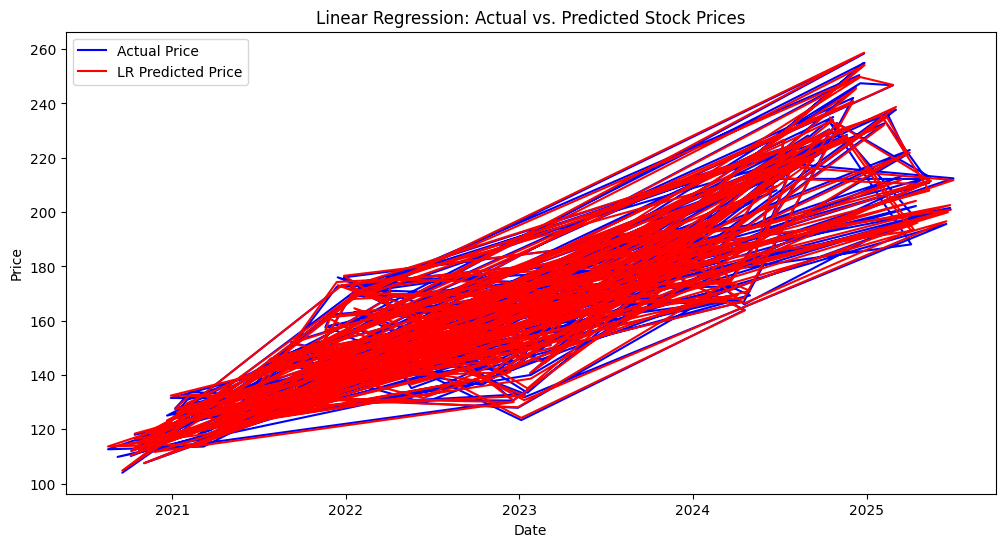

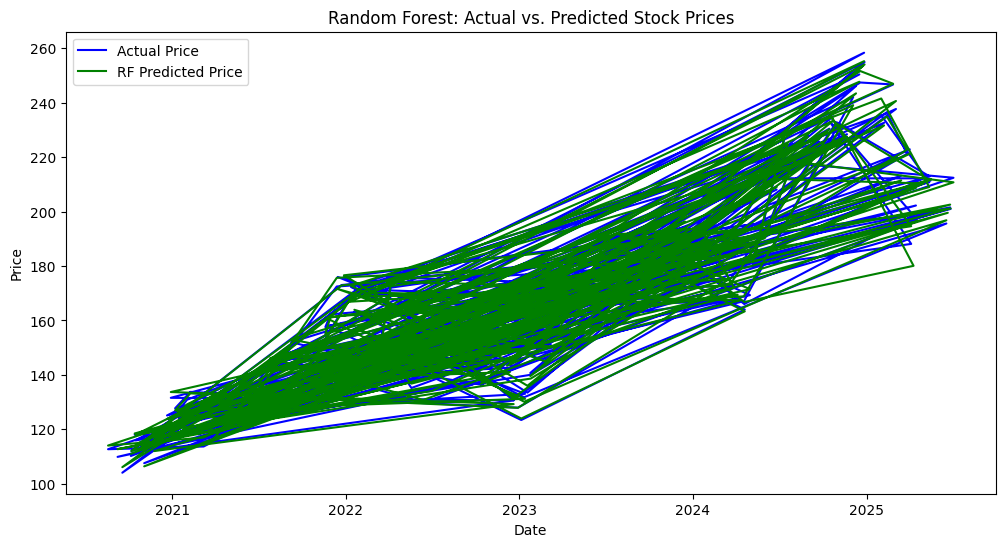

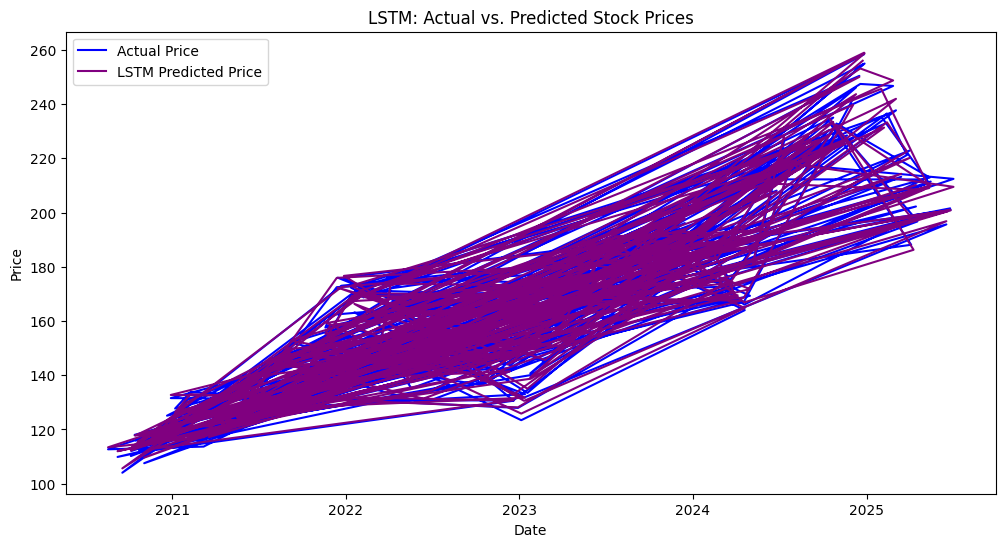

In [ ]:
import matplotlib.pyplot as plt

# 1. Predict using Linear Regression
y_pred_lr = linear_reg_model.predict(X_test)

# 2. Predict using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# 3. Predict using LSTM (predictions are already made and inverse transformed in the previous subtask)
# y_pred_lstm variable is already available from the previous subtask

# 4. Visualize Linear Regression predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lr, label='LR Predicted Price', color='red')
plt.title('Linear Regression: Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 5. Visualize Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_rf, label='RF Predicted Price', color='green')
plt.title('Random Forest: Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 6. Visualize LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_lstm, label='LSTM Predicted Price', color='purple')
plt.title('LSTM: Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Comparison and conclusion



Compare the performance metrics and draw conclusions based on the MSE, R2 values, and visualizations.



In [ ]:
print("Model Performance Comparison:")
print(f"Linear Regression: MSE = {mse_lr:.4f}, R2 = {r2_lr:.4f}")
print(f"Random Forest: MSE = {mse_rf:.4f}, R2 = {r2_rf:.4f}")
print(f"LSTM: MSE = {mse_lstm:.4f}, R2 = {r2_lstm:.4f}")

Model Performance Comparison:
Linear Regression: MSE = 1.2692, R2 = 0.9991
Random Forest: MSE = 3.9020, R2 = 0.9971
LSTM: MSE = 4.4483, R2 = 0.9967


**Analysis and Conclusion:**

Based on the Mean Squared Error (MSE) and R-squared (R2) values, we can compare the performance of the three models:

- Linear Regression has the lowest MSE and the highest R2, indicating it has the best performance among the three models on this dataset.
- Random Forest and LSTM models have higher MSE and slightly lower R2 compared to Linear Regression.
- The visualizations also support this, showing that the Linear Regression predictions align most closely with the actual prices.

**Strengths and Weaknesses:**

- Linear Regression: Simple, computationally efficient, and performed exceptionally well on this dataset, likely due to the strong linear relationship between the features (including the moving average) and the target variable.
- Random Forest: Non-linear model, can capture complex relationships, but performed slightly worse than Linear Regression in terms of MSE and R2 on this specific task.
- LSTM: Designed for sequential data, good for capturing temporal dependencies. While it performed well with a high R2, its MSE was higher than Linear Regression, suggesting it didn't outperform the simpler model for this particular stock prediction task with the current features and single time step approach.

**Conclusion:**

For this specific stock price prediction task using the provided dataset and features (including the 20-day moving average), the Linear Regression model is the most suitable.
It achieved the lowest Mean Squared Error and the highest R-squared value, indicating the best balance between accuracy and model fit.

The visualizations confirmed that its predictions were the closest to the actual stock prices.

## Summary:

### Data Analysis Key Findings

*   Historical stock data for AAPL for approximately the last 5 years was successfully downloaded and preprocessed.
*   A 20-day moving average was calculated as a new feature, and rows with missing values were removed.
*   The data was split into training and testing sets for model development.
*   Three different models (Linear Regression, Random Forest, and LSTM) were trained and evaluated for stock price prediction.
*   Linear Regression achieved the lowest Mean Squared Error (MSE) of approximately 1.27 and the highest R-squared (R2) of approximately 0.9991 on the test set.
*   Random Forest achieved an MSE of approximately 3.90 and an R2 of approximately 0.9971 on the test set.
*   The LSTM model, despite being designed for sequential data, achieved a higher MSE of approximately 4.45 and a lower R2 of approximately 0.9967 compared to Linear Regression on the test set.
*   Visualizations confirmed that the Linear Regression model's predictions most closely aligned with the actual stock prices on the test set.

### Insights or Next Steps

*   For this specific stock price prediction task with the chosen features, the simple Linear Regression model significantly outperformed the more complex Random Forest and LSTM models based on MSE and R2 metrics. This suggests that the relationship between the selected features and the target variable is predominantly linear.